# Skript: 09_01_Decision_tree_breast_cancer_datensatz

### Lernziele:
- Einsatz Decision-Tree Algorithmus
- Visualisierung Decision Tree
- Attrbitue-Importance


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

#### Daten beschaffen

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
# Die Struktur das Datensatzes
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [10]:
# Die Input-Variablen
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# Die fachliche Beschribung der Input-Variablen
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
cancer.data.shape

(569, 30)

#### Trainings-/Test-Daten estellen

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#### Modell erstellen und Modell - Güte ermitteln

In [10]:
baum = DecisionTreeClassifier(random_state=0)
baum.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(baum.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(baum.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Der Scoring-Wert bzgl. der Trainingsdaten liegt bei 100. Das zeigt an, dass das Modell eventuell *overfitted* ist.

#### Anzahl der Tiefe der Ebenen beschränken

Die Anzahl der Baum-Ebenen zu beschränken, kann ein Hilfsmittel sein, um die Gefahr des *Overfittings* zu minimieren. Der Algorithmus such dabei die Attribute mit dem höchsten Informationsgehalt (*Entropy*).

In [11]:
baum = DecisionTreeClassifier(max_depth=4, random_state=0)
baum.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(baum.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(baum.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Visualisierung des Baums

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(baum, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

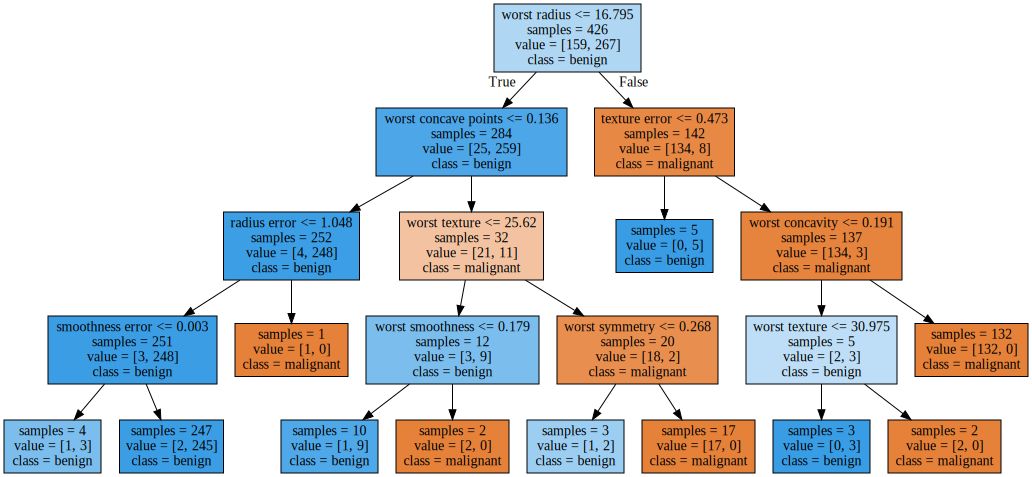

In [14]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance ausgeben / *Welche Attribute tragen am meisten zum Informationswert bei?*

Anhand dieser Liste kann man erkennen, warum der Baum mit bestimmten Attributen beginnt.

In [41]:
#print(baum.feature_importances_)
#print(cancer.feature_names)
importance_liste = pd.DataFrame(baum.feature_importances_, cancer.feature_names )
print(importance_liste.columns)
print(type(importance_liste))
print(importance_liste.sort_values(by=[0], ascending=[False]))  # absteigend sortiert


RangeIndex(start=0, stop=1, step=1)
<class 'pandas.core.frame.DataFrame'>
                                0
worst radius             0.726829
worst concave points     0.122113
texture error            0.048398
worst texture            0.045816
worst concavity          0.018188
worst smoothness         0.014158
worst symmetry           0.011885
radius error             0.010197
smoothness error         0.002416
mean radius              0.000000
concave points error     0.000000
worst compactness        0.000000
worst area               0.000000
worst perimeter          0.000000
fractal dimension error  0.000000
symmetry error           0.000000
compactness error        0.000000
concavity error          0.000000
mean texture             0.000000
area error               0.000000
perimeter error          0.000000
mean fractal dimension   0.000000
mean symmetry            0.000000
mean concave points      0.000000
mean concavity           0.000000
mean compactness         0.000000
mean smo